<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Creating anime characters using Deep Convolutional Generative Adversarial Networks (DCGANs) and Keras**


Imagine if you are in a video game company, your games is famous for its unique characters for every player. With the growth of the player amount, it comes to be a nearly impossible mission to hand plot the characters for millions of players. Your boss plans to keep the unique character creating function in the game, and you need a method to handle the task. <br>

__Generative adversarial networks (GANs) might help!__<br>
It is a class of machine learning frameworks, first published in June 2014 <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. <br>
GANs could generate new data following the statistic features of the data in the training set. GANs is widely used to generate new and realistic photograph that is authentic to human observers. <br>

Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Applying the CNNs to GANs models could help us in building a photo generating model. The combined method is called Deep Convolutional Generative Adversarial Networks (DCGANs). <br>

In this lab, we will first focus on simulated data to better understand GANs. <br>
Further, we will use the case of massive anime avatar production to introduce how to use DCGANs.<br>
__You will create anime characters like the ones below in this project.__

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/face_cartton.png" width="700" alt="Skills Network Logo">


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 skillsnetwork
# Note: If your environment doesn't support "!mamba install", use "!pip install"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 679.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.1 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install tqdm skillsnetwork

  Using cached skillsnetwork-0.21.9-py3-none-any.whl.metadata (2.0 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached skillsnetwork-0.21.9-py3-none-any.whl (26 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
Using cached jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
!pip3 install  --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_

_You need ~1 minute to import._


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

# Function to plot the distribution of real and generated data with optional discriminator overlay
def plot_distribution(real_data, generated_data, discriminator=None, density=True, bins=100, alpha=0.75, colors=('g', 'r')):
    """
    Plots histograms of real and generated data, optionally overlaying discriminator results.

    Parameters:
        real_data (Tensor or array-like): Data representing real distribution.
        generated_data (Tensor or array-like): Data representing generated distribution.
        discriminator (function, optional): Discriminator model to assess the generated data.
        density (bool): If True, normalize histogram.
        bins (int): Number of bins for histogram.
        alpha (float): Transparency for histogram bars.
        colors (tuple): Tuple of colors for real and generated data histograms.
    """
    # Convert real and generated data to numpy arrays if they are Tensors
    real_data = real_data.numpy() if tf.is_tensor(real_data) else np.array(real_data)
    generated_data = generated_data.numpy() if tf.is_tensor(generated_data) else np.array(generated_data)

    # Plot histograms for real and generated data
    plt.hist(real_data, bins=bins, density=density, facecolor=colors[0], alpha=alpha, label='real data')
    plt.hist(generated_data, bins=bins, density=density, facecolor=colors[1], alpha=alpha, label='generated data q(z)')

    # Overlay discriminator, if provided
    if discriminator:
        max_ = np.max([real_data.max(), generated_data.max()])
        min_ = np.min([real_data.min(), generated_data.min()])
        x = np.linspace(min_, max_, 1000).reshape(-1, 1)

        # Plot discriminator decision boundary
        plt.plot(x, tf.math.sigmoid(discriminator(x, training=False).numpy()), label='discriminator', color='k')
        plt.plot(x, 0.5 * np.ones(x.shape), label='0.5 threshold', color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

# Function to plot a grid of images from an array
def plot_array(X, title="", figsize=(20, 20), grid_shape=(1, 5), axis_off=True):
    """
    Plots an array of images in a grid format.

    Parameters:
        X (Tensor or array-like): Array of images to be plotted.
        title (str): Title for the plot.
        figsize (tuple): Size of the figure.
        grid_shape (tuple): Grid shape (rows, columns) for displaying images.
        axis_off (bool): If True, hides axis for each subplot.
    """
    plt.figure(figsize=figsize)
    plt.suptitle(title)
    rows, cols = grid_shape

    # Iterate over images and plot each one in a grid
    for i, x in enumerate(X[:rows * cols]):
        x = x.numpy() if tf.is_tensor(x) else np.array(x)
        x_min, x_max = x.min(), x.max()
        x_normalized = np.uint8(255 * (x - x_min) / (x_max - x_min))

        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_normalized, cmap='gray')
        if axis_off:
            plt.axis("off")

    plt.show()

----


In [4]:
from google.colab import files
files.upload()  # Unggah file kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d splcher/animefacedataset
!unzip animefacedataset.zip -d /content/animefacedataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/animefacedataset/images/62764_2019.jpg  
  inflating: /content/animefacedataset/images/62765_2019.jpg  
  inflating: /content/animefacedataset/images/62766_2019.jpg  
  inflating: /content/animefacedataset/images/62767_2019.jpg  
  inflating: /content/animefacedataset/images/62768_2019.jpg  
  inflating: /content/animefacedataset/images/62769_2019.jpg  
  inflating: /content/animefacedataset/images/6276_2003.jpg  
  inflating: /content/animefacedataset/images/62770_2019.jpg  
  inflating: /content/animefacedataset/images/62771_2019.jpg  
  inflating: /content/animefacedataset/images/62772_2019.jpg  
  inflating: /content/animefacedataset/images/62773_2019.jpg  
  inflating: /content/animefacedataset/images/62774_2019.jpg  
  inflating: /content/animefacedataset/images/62775_2019.jpg  
  inflating: /content/animefacedataset/images/62776_2019.jpg  
  inflating: /content/animefacedataset/images/62777_2019.jpg  
  inf

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [6]:
from google.colab import output
output.disable_custom_widget_manager()

In [7]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [8]:
from google.colab import output
output.disable_custom_widget_manager()

The Anime Face or the Cartoon images are stored in the `cartoon_2000` folder in your current working directory. As a preprocessing step, we have removed any files that are not proper image formats (based on the file extensions) and any duplicate images.


### Creating Data Generator


First, we declare some properties of our images, including image height, image width, and batch size.


In [38]:
img_height, img_width, batch_size=256,256,128

Next, we create a Keras <code>image_dataset_from_directory</code> object with a specified image directory and the parameters are defined as above. This process may take some time:


In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='animefacedataset/images',
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

Found 63565 files.


The `train_ds` we defined is a `tf.data.Dataset` that yields batches of images with `image_size = (64, 64)` from the directory specified or subdirectories (if any).


**(OPTIONAL)** If you are running this notebook locally and you have multiple cores, then we can use the runtime to tune the value dynamically at runtime as follows:


In [40]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

We apply the Lambda function on `train_ds` to normalize the pixel values of all the input images from $[0, 255]$ to $[-1, 1]$:


In [41]:
normalization_layer = layers.Rescaling(scale= 1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

Let's take one batch of images for displaying:


In [42]:
images=train_ds.take(1)

Convert the batch dimension to the indexes in a list:


In [43]:
X=[x for x in images]

We can then plot the first five images in the batch using the function   ```plot_array```:


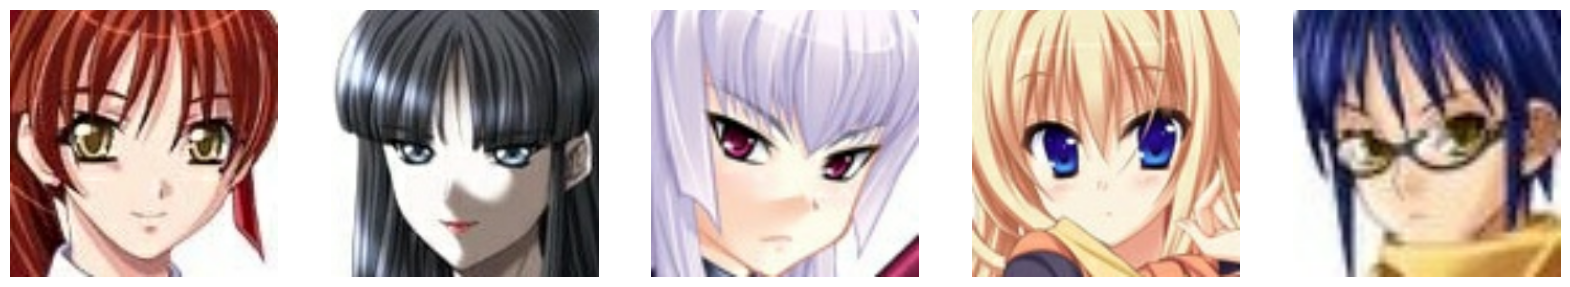

In [48]:
plot_array(X[0])

In [45]:
from tensorflow.keras import Model

def make_generator():
    # Create input layer explicitly
    inputs = Input(shape=(1, 1, 100), name='input_layer')

    # Block 1: input is latent vector -> 4x4x512
    x = Conv2DTranspose(64 * 8, kernel_size=4, strides=4, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_1')(inputs)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_1')(x)
    x = ReLU(name='relu_1')(x)

    # Block 2: 4x4x512 -> 8x8x256
    x = Conv2DTranspose(64 * 4, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_2')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_2')(x)
    x = ReLU(name='relu_2')(x)

    # Block 3: 8x8x256 -> 16x16x128
    x = Conv2DTranspose(64 * 2, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_3')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_3')(x)
    x = ReLU(name='relu_3')(x)

    # Block 4: 16x16x128 -> 32x32x64
    x = Conv2DTranspose(64 * 1, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_4')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_4')(x)
    x = ReLU(name='relu_4')(x)

    # Final Block: 32x32x64 -> 64x64x3
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, padding='same',
                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                            use_bias=False, activation='tanh',
                            name='conv_transpose_5')(x)

    # Create model using functional API
    model = Model(inputs=inputs, outputs=outputs, name='generator')

    return model

By printing the summary of the Generator architecture, we can see that the transposed convolutions **upsample** a 100-dim input vector to a high-dimensional image of size 64 x 64 x 3.


In [46]:
gen = make_generator()
gen.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_1 (Conv2DTranspose)   │ (None, 4, 4, 512)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_1 (ReLU)                        │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_2 (Conv2DTranspose)   │ (None, 8, 8, 256)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_2 (ReLU)                        │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_3 (Conv2DTranspose)   │ (None, 16, 16, 128)         │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_3 (ReLU)                        │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_4 (Conv2DTranspose)   │ (None, 32, 32, 64)          │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_4 (BatchNormalization)            │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_4 (ReLU)                        │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_5 (Conv2DTranspose)   │ (None, 64, 64, 3)           │           3,072 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,578,624 (13.65 MB)

 Trainable params: 3,576,704 (13.64 MB)

 Non-trainable params: 1,920 (7.50 KB)

___Building the Discriminator___


The Discriminator has five convolution layers.

- All but the first and final Conv2D layers have Batch Normalization, since directly applying batchnorm to all layers could result in sample oscillation and model instability;
- The first four Conv2D layers use the **Leaky-Relu activation** with a slope of 0.2.
- Lastly, instead of a fully connected layer, the  output layer has a convolution layer with a **Sigmoid activation** function.


In [47]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

By printing the summary of the Discriminator architecture, we can see that the strided convolutions **downsample** an input image of size 64 x 64 x 3.


----


# **Analisis Teknologi DCGAN untuk Pembuatan Karakter Anime**

### **Teknologi yang Digunakan**

Proyek ini memanfaatkan **Deep Convolutional Generative Adversarial Networks (DCGANs)** yang merupakan pengembangan dari GAN yang mengombinasikan arsitektur **Convolutional Neural Networks (CNN)** untuk meningkatkan kualitas gambar yang dihasilkan. Dengan mengadopsi CNN, DCGAN mampu memanfaatkan fitur spasial dalam gambar secara lebih optimal, sehingga menghasilkan gambar karakter anime yang lebih realistis. Model ini sangat sesuai untuk data visual kompleks seperti karakter anime yang memerlukan detail halus.

### **Library dan Alat yang Digunakan**

1. **Keras dan TensorFlow**  
Digunakan sebagai framework utama untuk membangun dan melatih DCGAN. Keras dengan API yang mudah digunakan mempercepat eksperimen, sementara TensorFlow mendukung eksekusi yang efisien untuk proses pelatihan model.

2. **Pandas dan NumPy**  
Membantu dalam pengelolaan data, manipulasi dataset gambar, dan perhitungan matematis yang diperlukan dalam pelatihan. NumPy juga memungkinkan pemrosesan array secara efisien yang mendukung manipulasi data gambar.

3. **Seaborn dan Matplotlib**  
Kedua library ini sangat penting dalam visualisasi data dan hasil output model sehingga memudahkan pemahaman pola yang dihasilkan oleh generator dalam DCGAN.

### **Analisis Teknologi yang Digunakan**

- **Penggabungan GAN dan CNN dalam DCGAN**  
Menggabungkan GAN dan CNN dalam DCGAN memungkinkan model untuk mengidentifikasi dan mempelajari fitur visual mendalam dari dataset. Dalam kode, penggunaan lapisan `Conv2DTranspose` dan `BatchNormalization` membantu DCGAN dalam memperbesar gambar, menstabilkan pelatihan, dan memastikan gambar yang dihasilkan memiliki kualitas mendekati gambar nyata.

- **Latent Space dan Generator-Discriminator dalam GAN**  
  DCGAN menggunakan dua komponen utama: **Generator** dan **Discriminator**. Generator bertugas menghasilkan gambar dari ruang laten, sedangkan Discriminator mengevaluasi kualitas gambar tersebut. Dalam kode, `plot_distribution` dapat digunakan untuk memvisualisasikan perbedaan antara distribusi gambar asli dan yang dihasilkan oleh generator. Fungsi ini juga dapat menampilkan hasil Discriminator, menunjukkan perbedaan visual antara data nyata dan palsu. **Latent space** adalah vektor acak yang dimasukkan ke dalam generator untuk menghasilkan gambar. Ruang laten ini membantu model untuk menghasilkan variasi gambar yang berbeda.

- **Kualitas Output dan Efektivitas Algoritma dalam Skala Besar**  
  DCGAN mampu menghasilkan karakter anime dengan kualitas tinggi dalam jumlah besar. Hal ini sangat bermanfaat dalam industri kreatif, seperti game dan animasi, yang membutuhkan karakter dalam variasi besar dengan waktu produksi singkat. Dalam kode, `plot_array` memungkinkan pengamatan visual dari beberapa gambar yang dihasilkan secara bersamaan, membantu dalam mengevaluasi keragaman dan kualitas hasil.

- **Penyesuaian Arsitektur Model**  
Dengan fleksibilitas Keras dan TensorFlow, penyesuaian arsitektur model DCGAN dapat dilakukan dengan mudah, misalnya menambah lapisan `Conv2D` atau mengatur hyperparameter seperti `learning rate`. Pada kode, parameter seperti `bins`, `alpha`, dan `colors` dalam `plot_distribution` membantu menyesuaikan visualisasi sesuai kebutuhan pengguna, memberikan gambaran lebih jelas tentang performa model.

### **Kesimpulan**

DCGAN adalah solusi tepat untuk menghasilkan karakter anime dalam jumlah besar dengan kualitas tinggi. Pipeline ini menawarkan efisiensi dalam produksi visual dan menghemat waktu dalam menghasilkan variasi karakter unik secara otomatis.